In [1]:
import sympy
from sympy import Ellipse, Point, S, Eq, latex, plot_implicit, Matrix, symbols, simplify, expand, collect, solve
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
import matplotlib.pyplot as plt
from IPython.display import Math, Latex

from sympy import Line, Eq, solve

# Практическое занятие 14
# Компьютерный практикум по алгебре на Python
### Задание 1.
Построить эллипс с центром в точке А(1, 2), полуосями 3 и 2. Вычислить и вывести на экран эксцентриситет, площадь и длину дуги полученного эллипса, центр, полуоси, periapsis, apoapsis, межфокусное расстояние и фокусы.

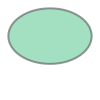

In [2]:
Ellipse1 = Ellipse(Point(1, 2), hradius=3, vradius=2)
Ellipse1

In [3]:
props = {'eccentricity': Ellipse1.eccentricity, 'area': Ellipse1.area, 'circumference': Ellipse1.circumference, 'center': Ellipse1.center,
         'hradius': Ellipse1.hradius, 'vradius': Ellipse1.vradius, 'periapsis': Ellipse1.periapsis, 'apoapsis': Ellipse1.apoapsis,
         'focus\_distance': Ellipse1.focus_distance, 'foci': Ellipse1.foci}
display(*[Latex(f'{key} = {latex(props[key])}') for key in props.keys()])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 2.
Вывести на экран уравнение эллипса из задания 1, повернутого на 30 градусов против часовой стрелки относительно его центра,  переменные u и v.

Изоразить на графике эллипс и повернутый эллипс.

In [4]:
u, v = symbols('u v')
Ellipse1.equation(u, v)

(u/3 - 1/3)**2 + (v/2 - 1)**2 - 1

In [5]:
EQ = Ellipse1.equation(u, v, _slope=sympy.sqrt(3)/3)
EQ

(u + sqrt(3)*(v - 2)/3 - 1)**2/12 + 3*(v - sqrt(3)*(u - 1)/3 - 2)**2/16 - 1

In [6]:
EQ2 = Ellipse1.equation(u, v)

In [7]:
symb_free_EQ = EQ.free_symbols
symb_free_EQ2 = EQ2.free_symbols

In [8]:
dict_free_EQ = {str(a): a for a in symb_free_EQ}
dict_free_EQ2 = {str(a): a for a in symb_free_EQ2}

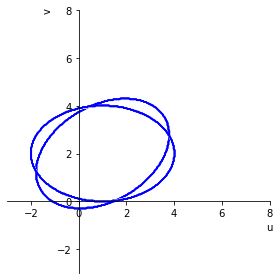

In [9]:
myplot = plot_implicit(EQ, (dict_free_EQ['u'], -3, 8), (dict_free_EQ['v'], -3, 8), aspect_ratio=(1, 1), adaptive=False, show=False)
myplot.extend(plot_implicit(EQ2, (dict_free_EQ2['u'], -3, 8), (dict_free_EQ2['v'], -3, 8), aspect_ratio=(1, 1), adaptive=False, show=False))
myplot.show()

### Задание 3.
Найти вершины эллипса из Задания 1.

Указание: вершины эллипса искать как решение системы уравнений, составленной из уравнения эллипса и уравнения прямой, проходящей через фокусы (воспользоваться Line и методом equation()); вторую пару вершин получить как решение системы из уравнения эллипса и прямой, проходящей через центр эллипса перпендикулярно прямой, проходящей через фокусы. 

In [10]:
Ellipse1 = Ellipse(Point(1, 2), hradius=3, vradius=2) # на всякий случай перезаписываем переменную заново

ellipse_equation = Ellipse1.equation(u, v)
my_line = Line(*Ellipse1.foci)
line_equation = my_line.equation(u, v)
solve_1 = solve([ellipse_equation, line_equation], u, v)

my_center = Ellipse1.center
my_perpendicular_line = my_line.perpendicular_line(my_center)
line_equation_2 = my_perpendicular_line.equation(u, v)
solve_2 = solve([ellipse_equation, line_equation_2], u, v)

print(f"Первая пара: {solve_1}", f"Вторая пара: {solve_2}", sep='\n')

Первая пара: [(-2, 2), (4, 2)]
Вторая пара: [(1, 0), (1, 4)]


###  Индивидуальное задание
Построить эллипс с заданными центром, вертикальной полуосью  и эксцентриситетом.
Изобразить на графике этот эллипс, а также эллипс, повернутый на угол $\alpha$ против часовой стрелки. 

Вывести на экран центр и фокусы эллипса, длины полуосей, уравнение эллипса, вершины эллипса.

Центр $Point2D\left(-3, 1\right)$, вертикальная полуось $8$, эксцентриситет $3 / 5$, угол поворота $\pi / 3$, по часовой стрелке.

In [11]:
my_ellipse = Ellipse(Point(-3, 1), vradius=8, eccentricity=3/5)

In [12]:
from sympy.abc import x, y
my_EQ = my_ellipse.equation(x='x', y='y')

In [13]:
my_EQ2 = my_ellipse.equation(x='x', y='y', _slope=sympy.sqrt(3))

In [14]:
my_symb_free = my_EQ.free_symbols
my_symb_free2 = my_EQ2.free_symbols

In [15]:
my_dict_free = {str(a): a for a in my_symb_free}
my_dict_free2 = {str(a): a for a in my_symb_free2}

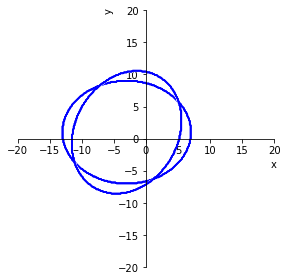

In [16]:
my_graph = plot_implicit(my_EQ, (my_dict_free['x'], -20, 20), (my_dict_free['y'], -20, 20), aspect_ratio=(1, 1), adaptive=False, show=False)
my_graph.extend(plot_implicit(my_EQ2, (my_dict_free2['x'], -20, 20), (my_dict_free2['y'], -20, 20), aspect_ratio=(1, 1), adaptive=False, show=False))
my_graph.show()

Хорасанджян Левон, вариант №157